<h1>Section 1.2</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [2]:
rng = np.random.default_rng()

In [3]:
sigma = 1

mean = (-1, -1)
cov = sigma * np.array([[2, 0.5], [0.5, 1]])
data_a = rng.multivariate_normal(mean, cov, 100)

mean = (1, -1)
cov = sigma * np.array([[1, -0.5], [-0.5, 2]])
data_b = rng.multivariate_normal(mean, cov, 100)

mean = (0, 1)
cov = sigma * np.array([[1, 0], [0, 2]])
data_c = rng.multivariate_normal(mean, cov, 100)

data = np.empty((300, 2))
data[:100] = data_a
data[100:200] = data_b
data[200:] = data_c

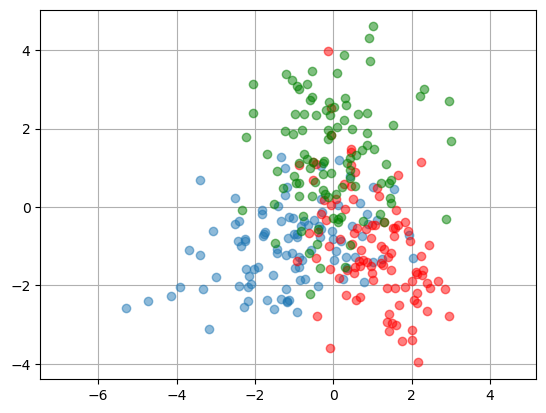

In [4]:
plt.plot(data[:100, 0], data[:100, 1], 'o', alpha=0.5)
plt.plot(data[100:200, 0], data[100:200, 1], 'ro', alpha=0.5)
plt.plot(data[200:, 0], data[200:, 1], 'go', alpha=0.5)
plt.axis('equal')
plt.grid()
plt.show()

In [119]:
def k_means(data, k):
    rng = np.random.default_rng()
    mu = rng.permutation(data)[:k, :]

    final_rule = None
    while True:
        dist = np.empty((data.shape[0], k))
        for i in range(k):
            dist[:,i] = np.square(data - mu[i]).sum(axis = 1)
        rule = np.argmin(dist, axis = 1)

        new_mu = np.empty_like(mu)
        for i in range(k):
            bool_arr = (rule == i)
            new_mu[i] = data[bool_arr].mean(axis = 0)
        if np.allclose(new_mu, mu):
            final_rule = rule
            break
        mu = new_mu
    
    return mu, final_rule
    

In [137]:
def GMM(data, k):
    rng = np.random.default_rng()
    mu = rng.permutation(data)[:k, :]
    
    data_var = np.var(data, axis = 0)
    temp_cov = np.empty((k, data.shape[1]))
    for i in range(data.shape[1]):
        temp_cov[:, i] = rng.uniform(data_var[i]*0.01, data_var[i], k)
    cov = np.empty((k, data.shape[1], data.shape[1]))
    for i in range(k):
        cov[i] = np.diag(temp_cov[i])
        
    phi = np.ones(k) / k
    
    
    while True:
        w = np.empty((data.shape[0], k))
        for i in range(k):
            w[:, i] = multivariate_normal.pdf(data, mean=mu[i], cov=cov[i], allow_singular = True)
        w = w * phi
        w = w / np.sum(w, axis = 1, keepdims = True)
        

        sum_w = w.sum(axis = 0)
        new_phi = sum_w / data.shape[0]
        new_mu = np.empty_like(mu)
        new_cov = np.empty_like(cov)
        
        for i in range(k):
            new_mu[i] = np.sum(data * w[:, i].reshape(-1, 1), axis = 0) / sum_w[i]
            new_cov[i] = (((data - new_mu[i]).T * w[:, i]) @ (data - new_mu[i])) / sum_w[i]
            
        if np.allclose(new_mu, mu) and np.allclose(new_phi, phi) and np.allclose(new_cov, cov):
            break
        mu = new_mu
        cov = new_cov
        phi = new_phi
        
    
    return phi, mu, cov
    

In [138]:
mu, final_rule = k_means(data, 3)

In [139]:
mu

array([[-1.90892054, -2.23529873],
       [-0.41516898,  2.40581864],
       [ 2.36516188, -1.1927816 ]])

In [140]:
final_rule

array([0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 1, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 0,
       0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1,
       0, 0, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [141]:
phi, mu, cov = GMM(data, 3)

In [142]:
mu

array([[-0.38225647, -0.46660612],
       [-0.54449278,  3.4646462 ],
       [ 0.81471078, -1.03408136]])

In [143]:
phi

array([0.61925869, 0.08856173, 0.29217958])

In [144]:
cov

array([[[ 5.91107424,  2.01806835],
        [ 2.01806835,  6.70995429]],

       [[ 1.42060403, -1.35320465],
        [-1.35320465,  2.37512166]],

       [[ 5.03795606, -1.89156233],
        [-1.89156233,  3.14895203]]])

In [148]:
def c_objective(data, mu, rule):
    return np.sum(np.square(data - mu[rule]))

In [149]:
def NLL(data, phi, mu, cov):
    k = len(phi)
    w = np.empty((data.shape[0], k))
    for i in range(k):
        w[:, i] = multivariate_normal.pdf(data, mean=mu[i], cov=cov[i], allow_singular = True)
    w = w * phi
    return - np.sum(np.log(np.sum(w, axis = 1)))

In [184]:
def c_accuracy(centers, rule):
    g_truth = np.array([[-1, -1], [1, -1], [0, 1]])
    dist = np.empty((centers.shape[0], centers.shape[0]))
    for i in range(centers.shape[0]):
        dist[i] = np.square(centers[i] - g_truth).sum(axis = 1)
    mapping = np.argmin(dist, axis = 1)
    mapped = mapping[rule]
    actual = np.empty_like(mapped)
    actual[:100] = 0
    actual[100:200] = 1
    actual[200:] = 2
    return np.mean(mapped == actual)

In [245]:
k_means_obj_list = []
k_means_acc_list = []
gmm_obj_list = []
gmm_acc_list = []

In [ ]:
for sigma in [0.5, 1, 2, 4, 8]:
    mean = (-1, -1)
    cov = sigma * np.array([[2, 0.5], [0.5, 1]])
    data_a = rng.multivariate_normal(mean, cov, 100)

    mean = (1, -1)
    cov = sigma * np.array([[1, -0.5], [-0.5, 2]])
    data_b = rng.multivariate_normal(mean, cov, 100)

    mean = (0, 1)
    cov = sigma * np.array([[1, 0], [0, 2]])
    data_c = rng.multivariate_normal(mean, cov, 100)

    data = np.empty((300, 2))
    data[:100] = data_a
    data[100:200] = data_b
    data[200:] = data_c
    
    best_obj = None
    best_acc = None
    for _ in range(50):
        mu, final_rule = k_means(data, 3)
        curr_obj = c_objective(data, mu, final_rule)
        if best_obj == None or curr_obj < best_obj:
            best_obj = curr_obj
            best_acc = c_accuracy(mu, final_rule)
    k_means_obj_list.append(best_obj)
    k_means_acc_list.append(best_acc)
    
    best_NLL = None
    best_obj = None
    best_acc = None
    for _ in range(50):
        phi, mu, cov = GMM(data, 3)
        curr_NLL = NLL(data, phi, mu, cov)
        if best_NLL == None or curr_NLL < best_NLL:
            best_NLL = curr_NLL

            k = len(phi)
            w = np.empty((data.shape[0], k))
            for i in range(k):
                w[:, i] = multivariate_normal.pdf(data, mean=mu[i], cov=cov[i], allow_singular = True)
            w = w * phi
            w = w / np.sum(w, axis = 1, keepdims = True)
            final_rule = np.argmax(w, axis = 1)
            best_acc = c_accuracy(mu, final_rule)
            best_obj = c_objective(data, mu, final_rule)
    gmm_obj_list.append(best_obj)
    gmm_acc_list.append(best_acc)

In [253]:
print(k_means_obj_list)
print(k_means_acc_list)
print(gmm_obj_list)
print(gmm_acc_list)

[317.43689284146683, 530.1983098078438, 968.2441320494471, 1729.3172634292748, 3523.4864368982244]
[0.8366666666666667, 0.7166666666666667, 0.6433333333333333, 0.58, 0.5066666666666667]
[380.9002259991696, 951.9673663213293, 1905.044952902766, 3436.0135380509873, 7500.424117569259]
[0.83, 0.5466666666666666, 0.47333333333333333, 0.49333333333333335, 0.38666666666666666]


In [254]:
sigma = [0.5, 1, 2, 4, 8]

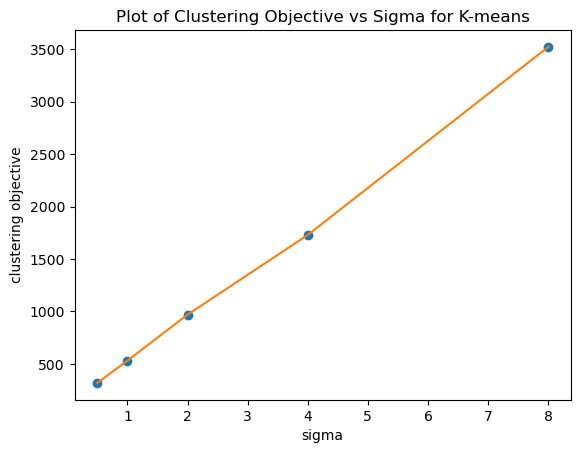

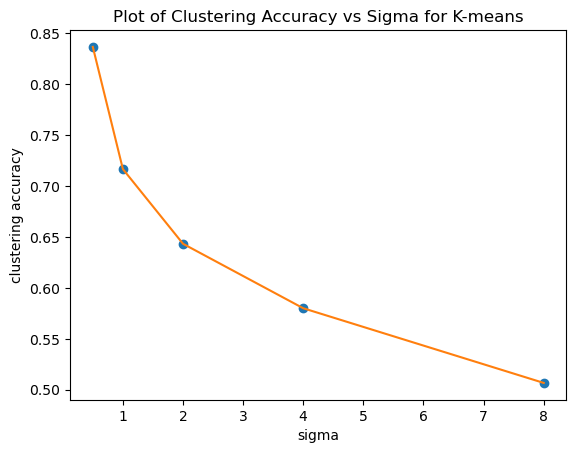

In [256]:
plt.plot(sigma, k_means_obj_list, 'o')
plt.plot(sigma, k_means_obj_list)
plt.xlabel('sigma')
plt.ylabel('clustering objective')
plt.title('Plot of Clustering Objective vs Sigma for K-means')
plt.show()

plt.plot(sigma, k_means_acc_list, 'o')
plt.plot(sigma, k_means_acc_list)
plt.xlabel('sigma')
plt.ylabel('clustering accuracy')
plt.title('Plot of Clustering Accuracy vs Sigma for K-means')
plt.show()

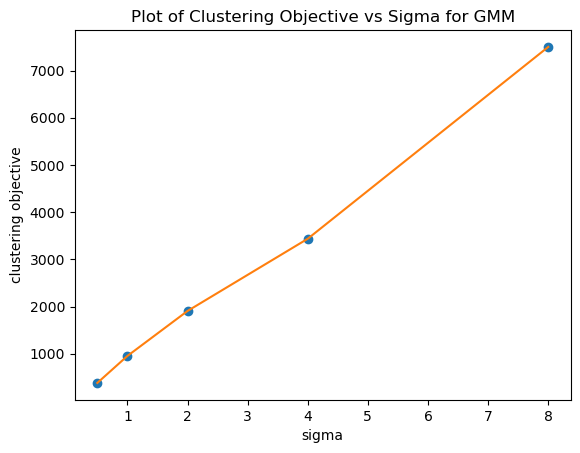

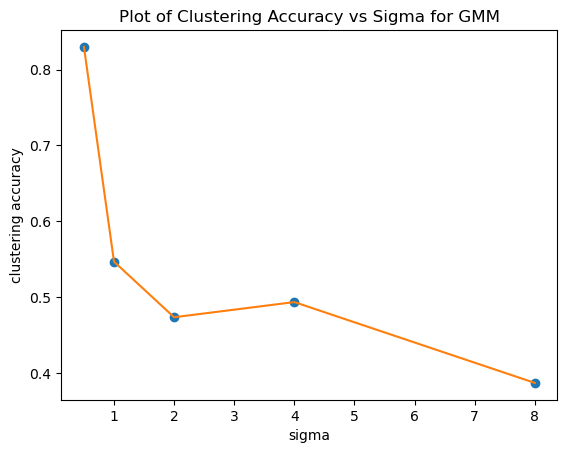

In [257]:
plt.plot(sigma, gmm_obj_list, 'o')
plt.plot(sigma, gmm_obj_list)
plt.xlabel('sigma')
plt.ylabel('clustering objective')
plt.title('Plot of Clustering Objective vs Sigma for GMM')
plt.show()

plt.plot(sigma, gmm_acc_list, 'o')
plt.plot(sigma, gmm_acc_list)
plt.xlabel('sigma')
plt.ylabel('clustering accuracy')
plt.title('Plot of Clustering Accuracy vs Sigma for GMM')
plt.show()

<h1>Section 2.3</h1>

In [268]:
def buggy_PCA(X, d):
    (U, S, Vt) = np.linalg.svd(X,full_matrices=False)
    reps = U[:,:d] @ np.diag(S[:d])
    pars = (U, S, Vt)
    recs = U[:,:d] @ np.diag(S[:d]) @ Vt[:d,:]
    return reps, pars, recs

In [280]:
def demeaned_PCA(X, d):
    means = np.mean(X, axis = 0, keepdims = True)
    X_proc = X - means
    reps, pars, recs = buggy_PCA(X_proc, d)
    recs_X = recs + means
    return reps, pars, recs_X

In [285]:
def normalized_PCA(X, d):
    means = np.mean(X, axis = 0, keepdims = True)
    std_devs = np.std(X, axis = 0, dtype=np.float64, ddof=1, keepdims = True)
    X_proc = (X - means)/std_devs
    reps, pars, recs = buggy_PCA(X_proc, d)
    recs_X = recs * std_devs + means
    return reps, pars, recs_X

In [299]:
def DRO(X, d):
    b = np.mean(X, axis = 0, keepdims = True)
    (U, S, Vt) = np.linalg.svd(X - b,full_matrices=False)
    n = X.shape[0]
    Z = U[:,:d]
    A = (Vt.T[:,:d] @ np.diag(S[:d]))
    pars = (A, b)
    recs = Z @ A.T + b
    return Z, pars, recs

<h2>For the 2D dataset</h2>

In [261]:
X_2D = np.loadtxt('data/data2D.csv', delimiter = ",")
X_2D

array([[7.26868515, 5.37618129],
       [4.30589536, 5.94935152],
       [5.03818311, 5.93694108],
       [7.47277215, 5.16840354],
       [6.29495531, 5.40468672],
       [5.63497575, 5.73117896],
       [5.55351199, 5.57303762],
       [4.83662451, 5.64756747],
       [6.17805166, 5.55346477],
       [5.24989961, 5.8461911 ],
       [6.72485009, 5.34499467],
       [4.61141232, 5.86606593],
       [6.11749397, 5.48870379],
       [6.98210491, 5.39941758],
       [5.37917756, 5.7470169 ],
       [6.52012918, 5.56802724],
       [5.99686041, 5.63047832],
       [5.53677161, 5.82073749],
       [5.65850542, 5.55691363],
       [7.16757724, 5.26341792],
       [6.09478005, 5.74654565],
       [6.81188109, 5.4664874 ],
       [6.62154165, 5.32362922],
       [6.32952609, 5.38090161],
       [7.91806251, 5.12939622],
       [3.95213121, 6.04541951],
       [4.29547396, 5.93994617],
       [4.73480846, 5.94532494],
       [7.11104456, 5.3466832 ],
       [6.26694635, 5.54515432],
       [5.

In [263]:
X_2D.shape

(50, 2)

In [271]:
_, _, recs = buggy_PCA(X_2D, 1)
error_b_pca = np.linalg.norm(X_2D - recs, ord = 'fro')

In [272]:
print('Reconstruction error for Buggy PCA:', error_b_pca)

Reconstruction error for Buggy PCA: 6.659215733608553


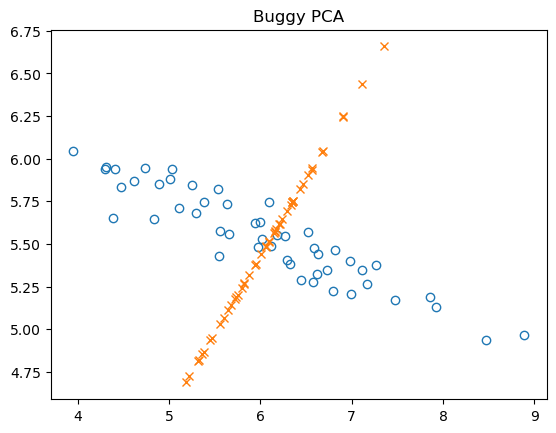

In [274]:
plt.plot(X_2D[:,0], X_2D[:,1], 'o', mfc='none')
plt.plot(recs[:,0], recs[:,1], 'x')
plt.title('Buggy PCA')
plt.show()

In [281]:
_, _, recs = demeaned_PCA(X_2D, 1)
error_d_pca = np.linalg.norm(X_2D - recs, ord = 'fro')

In [282]:
print('Reconstruction error for Demeaned PCA:', error_d_pca)

Reconstruction error for Demeaned PCA: 0.7073219079214541


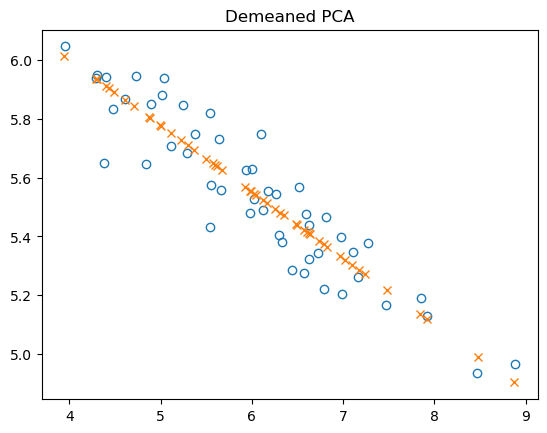

In [283]:
plt.plot(X_2D[:,0], X_2D[:,1], 'o', mfc='none')
plt.plot(recs[:,0], recs[:,1], 'x')
plt.title('Demeaned PCA')
plt.show()

In [286]:
_, _, recs = normalized_PCA(X_2D, 1)
error_n_pca = np.linalg.norm(X_2D - recs, ord = 'fro')

In [287]:
print('Reconstruction error for Normalized PCA:', error_n_pca)

Reconstruction error for Normalized PCA: 1.5727695866650442


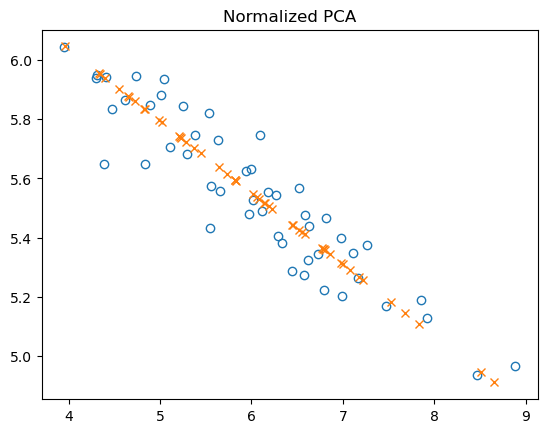

In [288]:
plt.plot(X_2D[:,0], X_2D[:,1], 'o', mfc='none')
plt.plot(recs[:,0], recs[:,1], 'x')
plt.title('Normalized PCA')
plt.show()

In [300]:
_, _, recs = DRO(X_2D, 1)
error_dro = np.linalg.norm(X_2D - recs, ord = 'fro')
print('Reconstruction error for DRO:', error_dro)

Reconstruction error for DRO: 0.7073219079214541


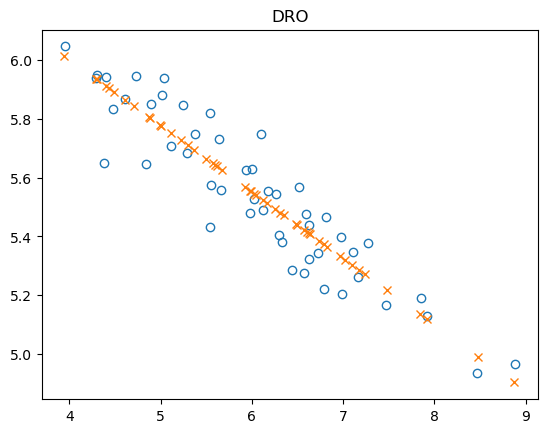

In [301]:
plt.plot(X_2D[:,0], X_2D[:,1], 'o', mfc='none')
plt.plot(recs[:,0], recs[:,1], 'x')
plt.title('DRO')
plt.show()

<h2>For the 1000D dataset</h2>

In [302]:
X_1000D = np.loadtxt('data/data1000D.csv', delimiter = ",")
X_1000D.shape

(500, 1000)

In [304]:
d_init = np.linalg.matrix_rank(X_1000D)
Z, pars, recs = DRO(X_1000D, d_init)
_, S, _ = np.linalg.svd(X_1000D - pars[1],full_matrices=False)
print(S)

[9.06944618e+02 8.99347183e+02 8.56076283e+02 8.21124899e+02
 8.20941909e+02 8.09725103e+02 7.78287025e+02 7.54747926e+02
 7.52025322e+02 7.40945148e+02 7.37311909e+02 7.25317273e+02
 7.03714353e+02 6.89223149e+02 6.85707405e+02 6.81073486e+02
 6.70649100e+02 6.60404143e+02 6.51842805e+02 6.41349697e+02
 6.32373122e+02 6.13864407e+02 6.05868033e+02 5.93571322e+02
 5.78347228e+02 5.71368731e+02 5.62886549e+02 5.57535429e+02
 5.41100841e+02 5.14786013e+02 2.87259008e+01 2.85120739e+01
 2.81959508e+01 2.80560462e+01 2.79991410e+01 2.77824398e+01
 2.77017621e+01 2.75286948e+01 2.74936594e+01 2.74401571e+01
 2.72902562e+01 2.72492343e+01 2.71350084e+01 2.70841984e+01
 2.69141735e+01 2.68692938e+01 2.67396137e+01 2.67087864e+01
 2.65392776e+01 2.64877420e+01 2.64570125e+01 2.63973391e+01
 2.63338370e+01 2.62486277e+01 2.60961398e+01 2.60634331e+01
 2.59133949e+01 2.59096981e+01 2.58061992e+01 2.57893736e+01
 2.57328049e+01 2.56564097e+01 2.56246685e+01 2.55343445e+01
 2.53935575e+01 2.534668

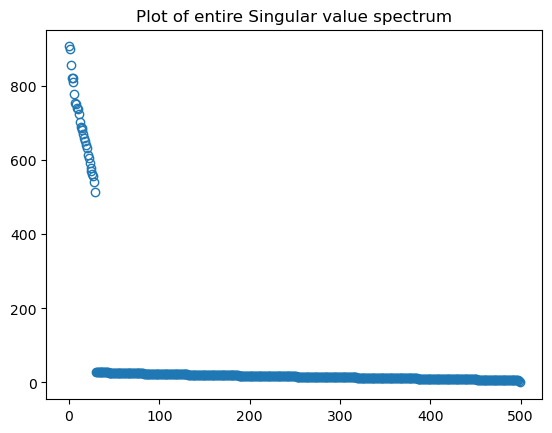

In [310]:
plt.plot(S, 'o', mfc='none')
plt.title("Plot of entire Singular value spectrum")
plt.show()

In [311]:
d = np.sum(S > 200)
d

30

In [312]:
# Hence we select d = 30

In [319]:
_, _, recs = buggy_PCA(X_1000D, d)
error = np.linalg.norm(X_1000D - recs, ord = 'fro')
print('Reconstruction error for Buggy PCA:', error)

Reconstruction error for Buggy PCA: 633.534292134358


In [320]:
_, _, recs = demeaned_PCA(X_1000D, d)
error = np.linalg.norm(X_1000D - recs, ord = 'fro')
print('Reconstruction error for Demeaned PCA:', error)

Reconstruction error for Demeaned PCA: 369.490161559547


In [321]:
_, _, recs = normalized_PCA(X_1000D, d)
error = np.linalg.norm(X_1000D - recs, ord = 'fro')
print('Reconstruction error for Normalized PCA:', error)

Reconstruction error for Normalized PCA: 369.88415821552945


In [322]:
_, _, recs = DRO(X_1000D, d)
error = np.linalg.norm(X_1000D - recs, ord = 'fro')
print('Reconstruction error for DRO:', error)

Reconstruction error for DRO: 369.4901615595471
